(60, 2)
        x        y
0  1.0472 0.795794
1 1.11701  0.77537
2 1.18682 0.917377
3 1.25664 0.844052
4 1.32645  1.10625


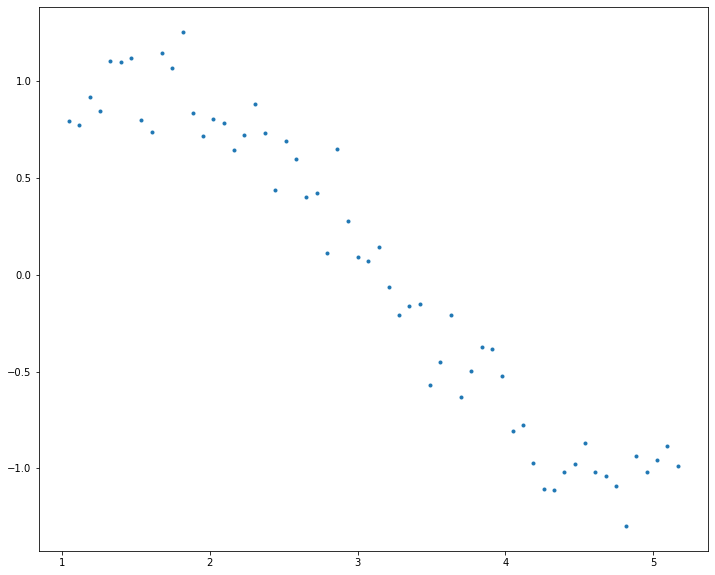

In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Definir un tableau avec des angles de 60deg a 300deg convert en radians (mes données)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(777)
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])


print(data.shape)
print(data.head())
plt.plot(data['x'],data['y'],'.')



In [9]:
#Passer de 1 colonne pour x a 15 colonnes
for i in range(2,16):  
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
    
    
print(data.head())    
data.shape

        x        y     x_2     x_3     x_4     x_5     x_6     x_7     x_8  \
0  1.0472 0.795794 1.09662 1.14838 1.20258 1.25934 1.31878 1.38102  1.4462   
1 1.11701  0.77537 1.24771 1.39371 1.55679 1.73895 1.94242 2.16971 2.42359   
2 1.18682 0.917377 1.40855  1.6717 1.98402 2.35468 2.79459 3.31668 3.93632   
3 1.25664 0.844052 1.57914  1.9844 2.49367 3.13364 3.93785 4.94845  6.2184   
4 1.32645  1.10625 1.75947 2.33385 3.09574 4.10634 5.44685 7.22498 9.58358   

      x_9    x_10    x_11    x_12    x_13    x_14    x_15  
0 1.51446 1.58594 1.66079 1.73918 1.82126 1.90722 1.99724  
1 2.70717 3.02394 3.37778 3.77301 4.21449 4.70763 5.25848  
2 4.67172 5.54451 6.58035 7.80972 9.26876 11.0004 13.0555  
3 7.81428 9.81971 12.3398 15.5067 19.4862 24.4871 30.7714  
4 12.7121  16.862 22.3666 29.6682 39.3534 52.2004 69.2412  


(60, 16)

# Elastic Net Regression  

\begin{equation}
{\rm RSS}(w):=\sum_{i=1}^N\left(y_i-\sum_{j=0}^Mw_jx_i^j\right)^2+\lambda \sum_{j=0}^M w_j^2+\mu \sum_{j=0}^M |w_j|\tag{E}
\end{equation}

In [10]:
from sklearn.linear_model import ElasticNet
def ElasticNet_Regression(data, predictors, alpha, beta, mdl_a={}, mdl_b={}):
    
    #definir la regression, entrainer le modéle et faire des predicitions
    ElNetreg = ElasticNet(alpha=alpha, l1_ratio=beta, max_iter=199999)
    ElNetreg.fit(data[predictors],data['y'])                                                 #trouver w optimal qui minimise (E) 
    y_el_pred =  ElNetreg.predict(data[predictors])             
    
    
    #Verifier si le plot est possible pour les alpha et beta renseigné
    if alpha in mdl_a:
        if beta in mdl_b:
          plt.subplot(mdl_a[alpha])                              #le nombre de plot a afficher mettre alpha ou beta c'est pareil
          plt.tight_layout()
          plt.plot(data['x'],y_el_pred, linewidth=4, color = 'r')
          plt.plot(data['x'],data['y'],'.',color = 'b')
          plt.title('Plot for alpha: %.3g'%alpha+' & beta: %.3g'%beta)
    
    
    rss = sum((y_el_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ElNetreg.intercept_])
    ret.extend(ElNetreg.coef_)
    return ret

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.599587928943205, tolerance: 0.0037184529985760046
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5995879683866385, tolerance: 0.0037184529985760046
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5995918729198348, tolerance: 0.0037184529985760046
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Converg

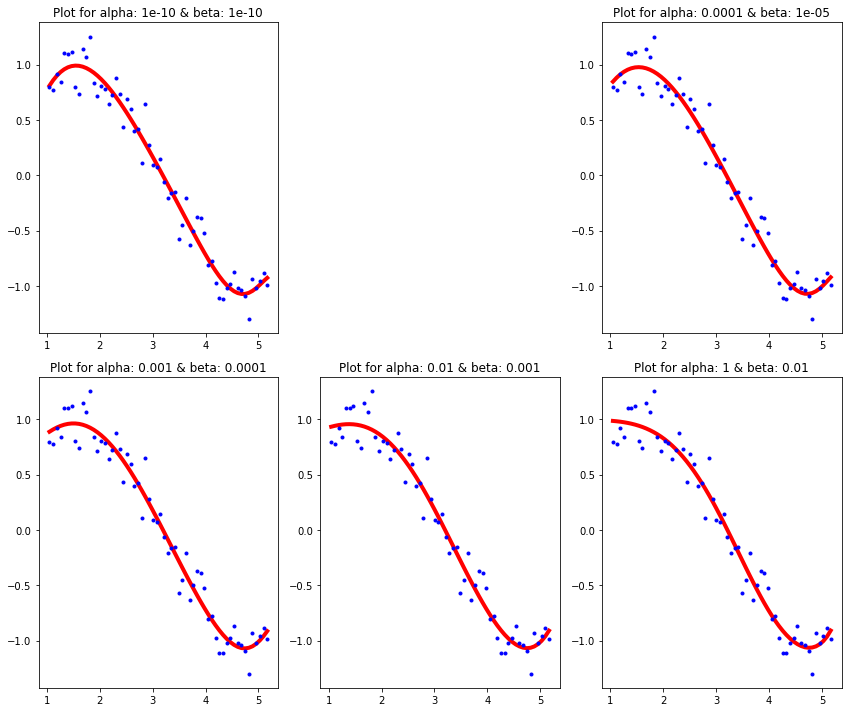

In [11]:
rcParams['figure.figsize'] = 12, 10

#Initialiser predictors pour les 15 colonnes de x.
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Differentes vlaeurs de alpha.
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Differentes vlaeurs de beta.
beta = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]



#Initialiser le dataframe pour les coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.3g'%alpha[i]+' & beta_%.3g'%beta[i] for i in range(0,10)]

coef_matrix_ElasticNet = pd.DataFrame(index=ind, columns=col)

mdl_a = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

mdl_b = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

for i in range(10):
    coef_matrix_ElasticNet.iloc[i,] = ElasticNet_Regression(data, predictors, alpha[i], beta[i], mdl_a, mdl_b)
    

In [12]:
#Format et matrice de coefficients de ElasticNet
pd.options.display.float_format = '{:,.6g}'.format
coef_matrix_ElasticNet

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15 & beta_1e-15,1.19918,-1.1496,3.12757,-1.32439,0.10127,0.0174851,0.000376539,-0.000290792,-6.84261e-05,-8.41442e-06,-1.98806e-07,2.08449e-07,6.80389e-08,1.33654e-08,1.57834e-09,-7.71725e-11,-1.19754e-10
alpha_1e-10 & beta_1e-10,1.19918,-1.1496,3.12757,-1.32439,0.10127,0.0174851,0.000376542,-0.000290791,-6.84261e-05,-8.41442e-06,-1.98807e-07,2.08449e-07,6.80389e-08,1.33654e-08,1.57834e-09,-7.71724e-11,-1.19754e-10
alpha_1e-08 & beta_1e-08,1.19918,-1.14949,3.12737,-1.32427,0.101244,0.0174857,0.000376765,-0.000290767,-6.84253e-05,-8.4147e-06,-1.98888e-07,2.08436e-07,6.80373e-08,1.33653e-08,1.57835e-09,-7.71648e-11,-1.19752e-10
alpha_0.0001 & beta_1e-05,1.20966,-0.411224,1.82901,-0.553662,-0.0681432,0.0215134,0.00192315,-0.000126108,-6.39485e-05,-1.05126e-05,-7.64181e-07,1.16697e-07,5.76333e-08,1.28428e-08,1.70696e-09,-2.49278e-11,-1.07818e-10
alpha_0.001 & beta_0.0001,1.23177,0.393,0.439461,0.241392,-0.22454,0.0187095,0.00402683,0.000118738,-5.59968e-05,-1.33456e-05,-1.53976e-06,-5.2728e-09,4.49364e-08,1.24751e-08,1.92622e-09,4.35872e-11,-9.53915e-11
alpha_0.01 & beta_0.001,1.26644,0.756191,0.107755,0.138917,-0.0550771,-0.0269068,0.00508746,0.000560114,-3.59155e-06,-1.08573e-05,-2.04008e-06,-1.81431e-07,1.16876e-08,8.12833e-09,1.67218e-09,1.18236e-10,-5.8032e-11
alpha_1 & beta_0.01,1.32305,0.994812,0,0,0,-0.00201548,-0.00675757,0.000985645,0.000156453,2.55559e-06,-1.88824e-06,-4.18906e-07,-4.97336e-08,-1.82264e-09,7.32392e-10,1.92059e-10,1.08135e-11
alpha_5 & beta_1,1.55503,0.874695,-0,-0,-0,-0,-0,-0,-0.000767995,8.05462e-05,3.64766e-05,-5.12732e-08,-5.15035e-07,-9.66008e-08,-1.02975e-08,2.61147e-10,5.11616e-10
alpha_10 & beta_5,2.28677,0.784243,0,-0,-0,-0,-0,-0,-0,-0.000137112,-0,9.80711e-06,1.2667e-07,-1.1894e-07,-2.37692e-08,-1.53508e-09,5.67112e-10
alpha_20 & beta_10,3.21179,0.724216,0,0,-0,-0,-0,-0,-0,-0,-3.02723e-05,-0,2.05596e-06,3.35738e-09,-2.12445e-08,-3.36765e-09,9.2446e-11


In [13]:
#Afficher le nombre de coefficients qui ont été mis a 0
coef_matrix_ElasticNet.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15 & beta_1e-15     0
alpha_1e-10 & beta_1e-10     0
alpha_1e-08 & beta_1e-08     0
alpha_0.0001 & beta_1e-05    0
alpha_0.001 & beta_0.0001    0
alpha_0.01 & beta_0.001      0
alpha_1 & beta_0.01          3
alpha_5 & beta_1             6
alpha_10 & beta_5            8
alpha_20 & beta_10           9
dtype: int32